<a href="https://colab.research.google.com/github/Vanamnikhil/Lung-Cancer-Prediction/blob/main/lungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
pip install sns

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv(r"/content/survey_lung_cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


In [95]:
df.shape

(309, 16)

In [96]:
df.duplicated().sum()

33

In [97]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [98]:
# Handling the missing values
df.dropna(inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [100]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


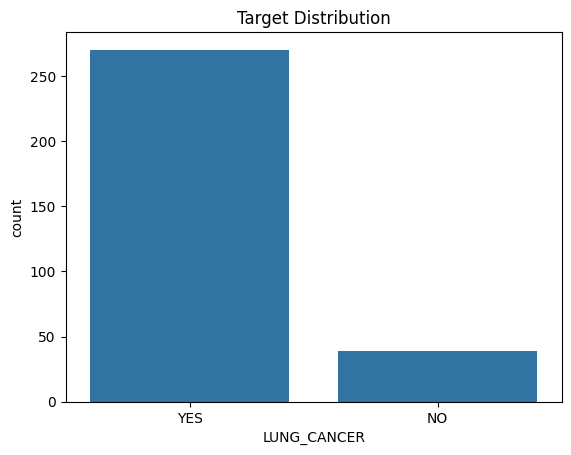

In [101]:
#Let's check the distributaion of Target variable.
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [102]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


In [103]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

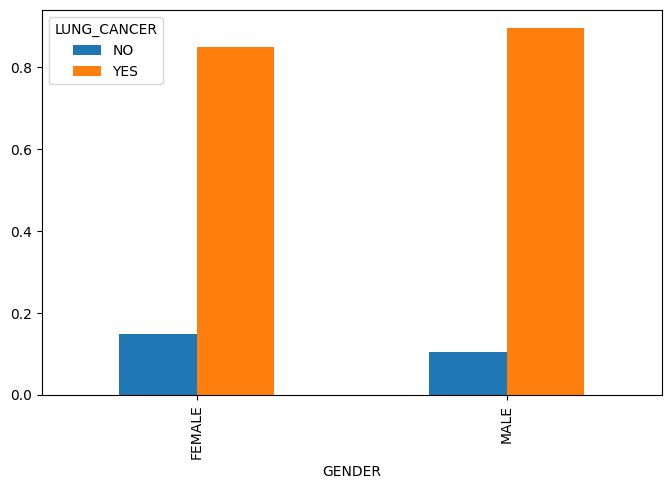

In [104]:
plot('GENDER')

<Axes: xlabel='AGE'>

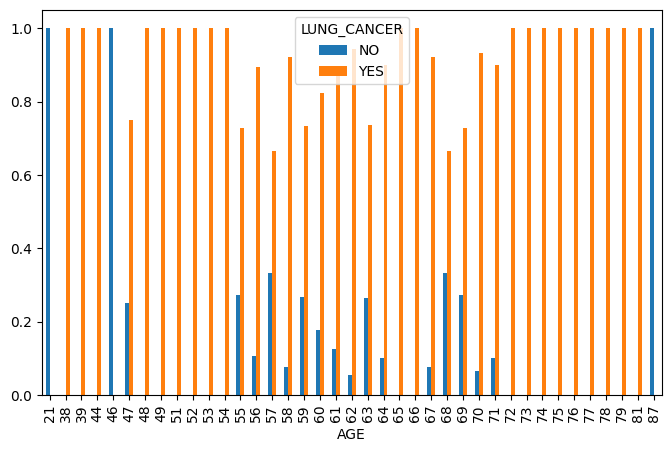

In [105]:
plot('AGE')

<Axes: xlabel='SMOKING'>

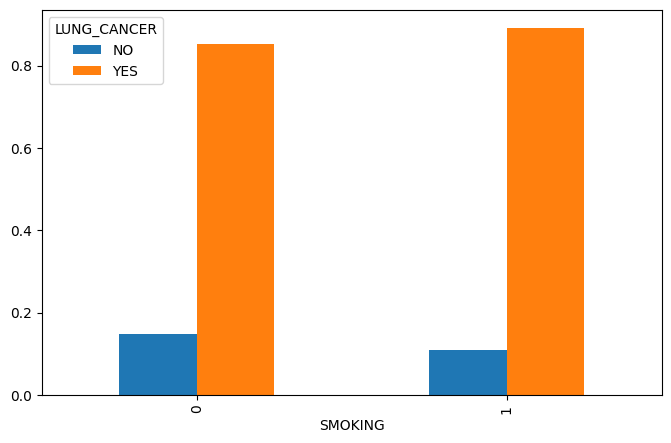

In [106]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

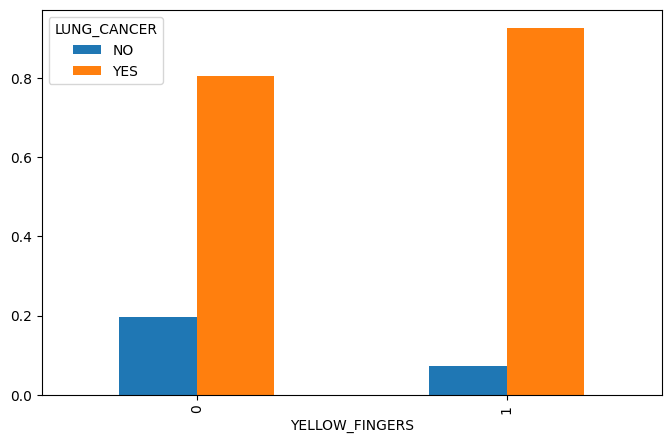

In [107]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

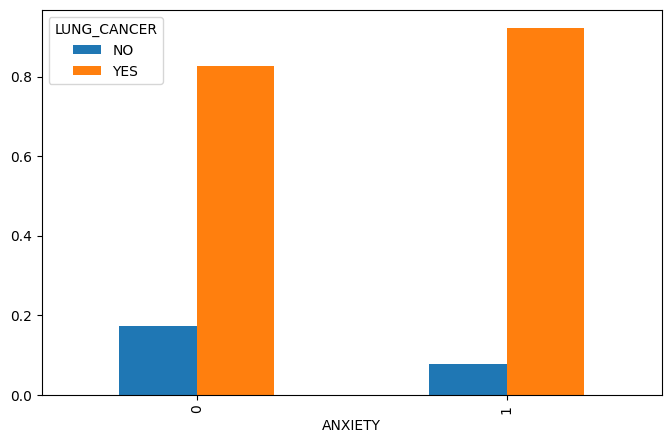

In [108]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

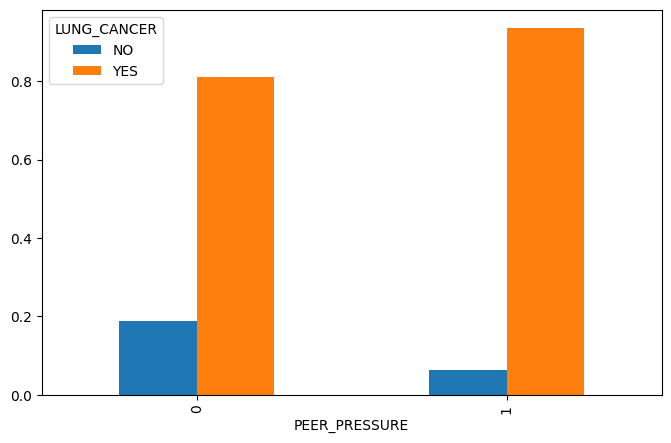

In [109]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

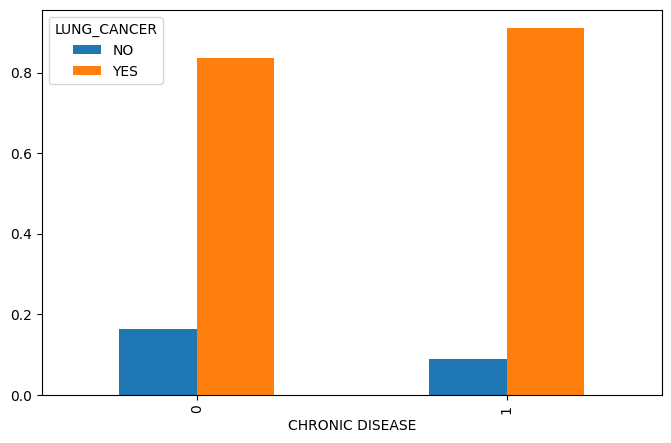

In [110]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

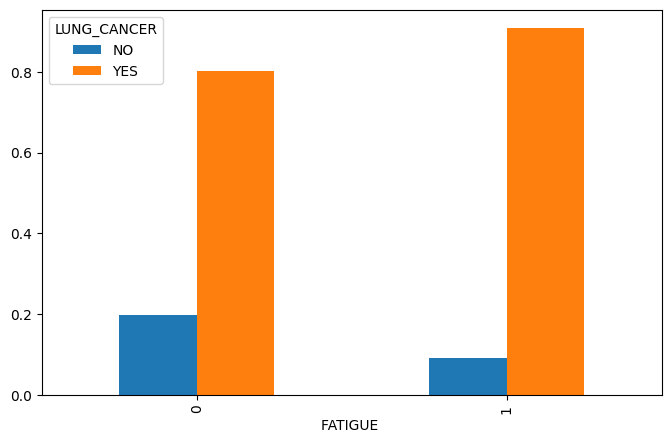

In [111]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

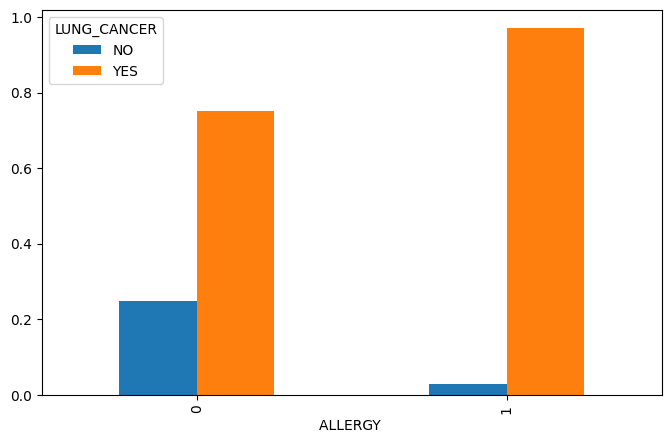

In [112]:
plot('ALLERGY ')


<Axes: xlabel='CHEST PAIN'>

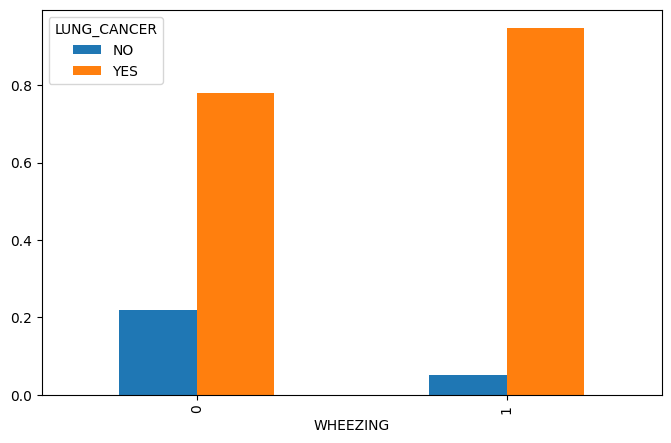

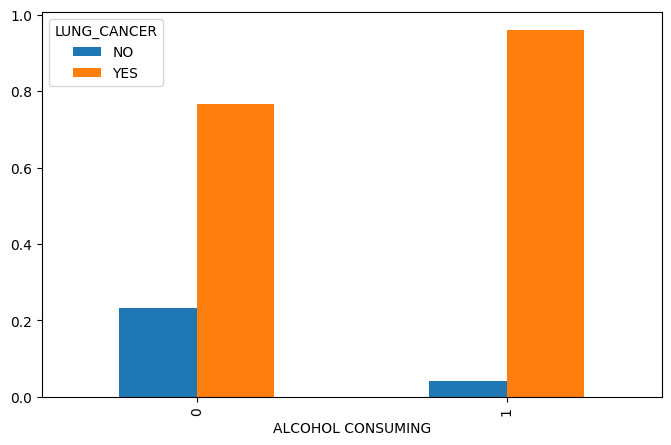

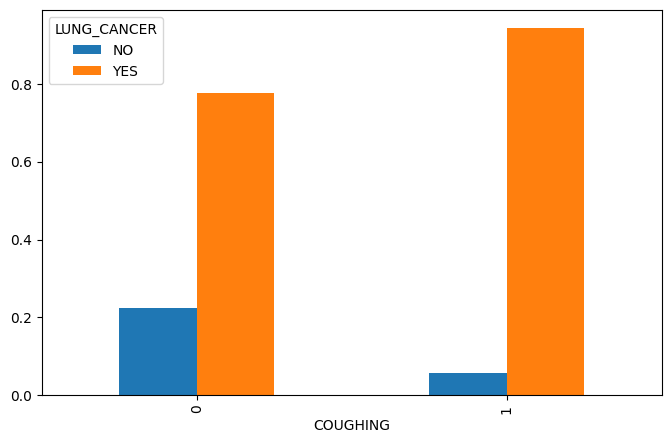

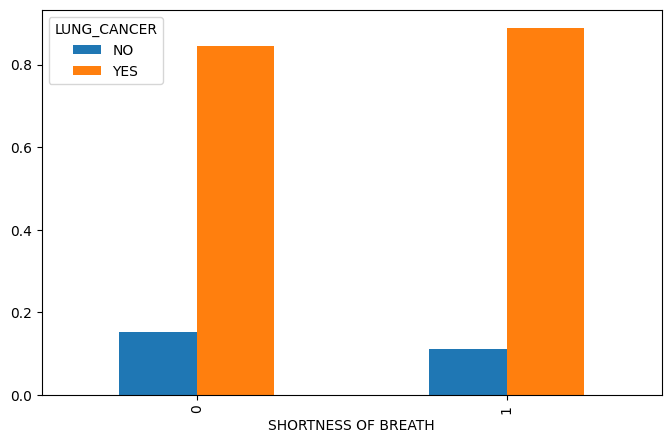

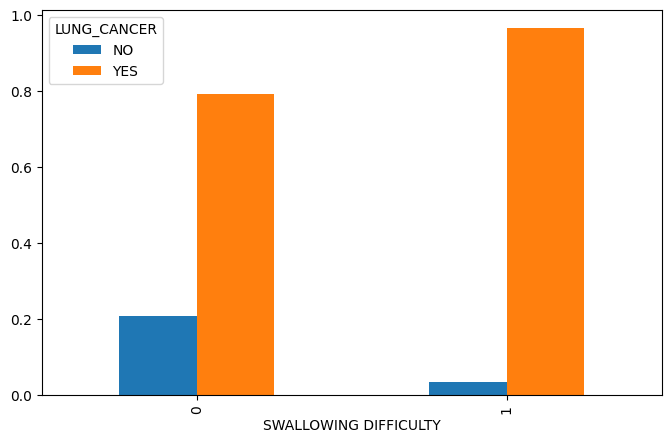

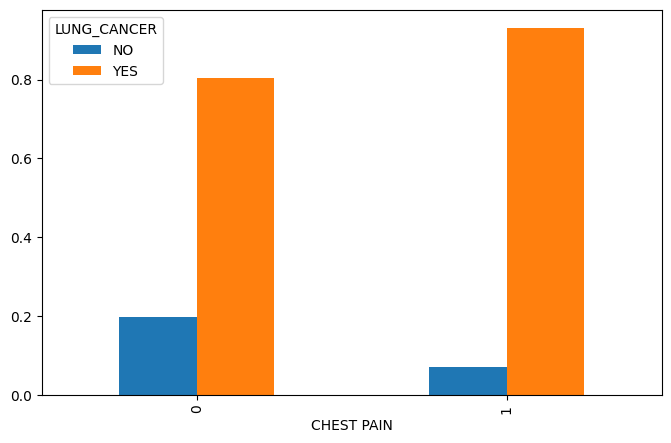

In [113]:
plot('WHEEZING')
plot('ALCOHOL CONSUMING')
plot('COUGHING')
plot('SHORTNESS OF BREATH')
plot('SWALLOWING DIFFICULTY')
plot('CHEST PAIN')

In [114]:
df=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,YES
1,0,0,0,1,1,1,0,0,0,1,1,YES
2,0,0,1,0,1,0,1,0,1,0,1,NO
3,1,1,0,0,0,0,0,1,0,1,1,NO
4,1,0,0,0,0,0,1,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,1,1,1,0,0,1,1,1,0,YES
305,0,0,0,0,1,1,1,1,1,0,1,YES
306,0,0,0,0,0,1,1,1,1,0,1,YES
307,0,1,0,0,1,1,0,1,1,0,1,YES


In [115]:

# Initialize LabelEncoders
label_encoders = {}
categorical_columns = ['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING',
                       'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

In [116]:
# Encode categorical variables
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [117]:
# Create the feature matrix X by dropping the target variable 'LUNG_CANCER'
X = df.drop(columns=['LUNG_CANCER'])

# Create the target vector y containing 'LUNG_CANCER'
y = df['LUNG_CANCER']

In [118]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [120]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
#Predicting result using testing data
y_lr_pred= rf_classifier.predict(X_test)
y_lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
accu=accuracy_score(y_test, y_lr_pred)
f1=f1_score(y_test, y_lr_pred)
print("Classification Report:")
print(lr_cr)
print("Accuracy:",accu)
print("F1-Score:",f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

Accuracy: 0.9516129032258065
F1-Score: 0.9747899159663865


In [123]:
# Save the trained Random Forest model
joblib.dump(rf_classifier, '/content/drive/MyDrive/Models/lung_cancer_model.pkl')

['/content/drive/MyDrive/Models/lung_cancer_model.pkl']

In [125]:
# Save the label encoders
for column, encoder in label_encoders.items():
    joblib.dump(encoder, f'/content/drive/MyDrive/Models/label_encoder_{column.lower()}.pkl')

In [126]:
import pandas as pd
import joblib


In [129]:
# Load the trained Random Forest model
rf_classifier = joblib.load('/content/drive/MyDrive/Models/lung_cancer_model.pkl')

In [130]:
# Load the label encoders
label_encoders = {}
categorical_columns = ['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING',
                       'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [131]:
for column in categorical_columns:
    label_encoders[column] = joblib.load(f'/content/drive/MyDrive/Models/label_encoder_{column.lower()}.pkl')

In [132]:
# Function to take user input and predict lung cancer
def predict_lung_cancer():
    # Dictionary to store user inputs
    user_input = {}

    # Prompt user for input for each feature except 'GENDER', 'AGE', 'SMOKING', 'SHORTNESS OF BREATH'
    for column in categorical_columns:
        value = input(f"Enter value for {column} (0/1): ")
        user_input[column] = [int(value)]



    # Convert the user input into a DataFrame
    input_data = pd.DataFrame(user_input)

    # Encode the categorical data
    for column in categorical_columns:
        input_data[column] = label_encoders[column].transform(input_data[column])

    # Use the trained model to predict the target variable 'LUNG_CANCER'
    prediction = rf_classifier.predict(input_data)

    # Output the prediction
    print("Predicted LUNG_CANCER outcome:", prediction[0])



In [135]:
# Call the function to take input and predict
predict_lung_cancer()

Enter value for YELLOW_FINGERS (0/1): 1
Enter value for ANXIETY (0/1): 1
Enter value for PEER_PRESSURE (0/1): 0
Enter value for CHRONIC DISEASE (0/1): 1
Enter value for FATIGUE  (0/1): 0
Enter value for ALLERGY  (0/1): 1
Enter value for WHEEZING (0/1): 0
Enter value for ALCOHOL CONSUMING (0/1): 1
Enter value for COUGHING (0/1): 0
Enter value for SWALLOWING DIFFICULTY (0/1): 0
Enter value for CHEST PAIN (0/1): 1
Predicted LUNG_CANCER outcome: 1
